In [6]:
import os
import mne
import pandas as pd

# Base directory containing all participant folders
base_dir = r'C:\Users\kiran\Downloads\ds004998\ds004998'

# List to store extracted data
data_list = []
patient_count = 0  # Counter to keep track of the number of processed patients
max_patients = 3   # Limit to 3 patients for this example
chunk_duration = 30.0  # Duration of each chunk in seconds

# Loop through each participant's folder
for participant_folder in os.listdir(base_dir):
    if participant_folder.startswith('sub-'):  # Check if the folder name starts with 'sub-'
        participant_path = os.path.join(base_dir, participant_folder)
        print(f"Processing participant: {participant_folder}")
        
        # Check if it's a directory
        if os.path.isdir(participant_path):
            # Navigate to the session subfolder (e.g., 'ses-PeriOp')
            for session_folder in os.listdir(participant_path):
                session_path = os.path.join(participant_path, session_folder)
                
                if os.path.isdir(session_path):
                    # Navigate to the 'meg' subfolder within the session folder
                    meg_folder = os.path.join(session_path, 'meg')
                    if os.path.isdir(meg_folder):
                        print(f"Found 'meg' folder for {participant_folder} in session {session_folder}")
                        
                        # Loop through MEG files in the 'meg' folder
                        for file_name in os.listdir(meg_folder):
                            if file_name.endswith('.fif'):  # Check for FIF files
                                file_path = os.path.join(meg_folder, file_name)
                                print(f"Attempting to load file: {file_name}")
                                
                                try:
                                    # Load the FIF file in chunks
                                    raw_data = mne.io.read_raw_fif(file_path, preload=False)
                                    sfreq = raw_data.info['sfreq']  # Get the sampling frequency
                                    total_samples = len(raw_data.times)  # Total number of samples
                                    
                                    # Process in chunks
                                    start_sample = 0
                                    chunk_samples = int(chunk_duration * sfreq)  # Convert chunk duration to samples
                                    
                                    while start_sample < total_samples:
                                        end_sample = min(start_sample + chunk_samples, total_samples)
                                        print(f"Reading data from sample {start_sample} to {end_sample}")
                                        
                                        data, times = raw_data.get_data(start=start_sample, stop=end_sample, return_times=True)
                                        
                                        # Create a DataFrame for the chunk
                                        df = pd.DataFrame(data.T, columns=[ch['ch_name'] for ch in raw_data.info['chs']])
                                        df['time'] = times
                                        df['subject_id'] = participant_folder
                                        df['task'] = file_name.split('_')[2].split('-')[1]
                                        df['acquisition'] = file_name.split('_')[3].split('-')[1]
                                        df['medication_status'] = file_name.split('_')[4].split('-')[1]
                                        
                                        # Append to the list
                                        data_list.append(df)
                                        start_sample = end_sample
                                        
                                except Exception as e:
                                    print(f"Error processing {file_name}: {e}")
                    
                    # Break the loop once a patient has been fully processed
                    break
        
        # Increment the patient count
        patient_count += 1
        if patient_count >= max_patients:
            print(f"Processed the maximum of {max_patients} patients. Stopping.")
            break

# Combine all data into a single DataFrame if there is any data
if data_list:
    combined_df = pd.concat(data_list, ignore_index=True)
    # Save the combined data to a CSV file
    output_csv_path = r'C:\Users\kiran\Downloads\combined_data_3_patients.csv'
    combined_df.to_csv(output_csv_path, index=False)
    print(f"Data successfully saved to {output_csv_path}")
else:
    print("No valid data was extracted.")


Processing participant: sub-0cGdk9
Found 'meg' folder for sub-0cGdk9 in session ses-PeriOp
Attempting to load file: sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-0cGdk9\ses-PeriOp\meg\sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 124500 ... 1597499 =     62.250 ...   798.750 secs
Ready.
Reading data from sample 0 to 60000
Reading data from sample 60000 to 120000
Reading data from sample 120000 to 180000
Reading data from s

Traceback (most recent call last):
  File "c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\3683279062.py", line 80, in <module>
    combined_df = pd.concat(data_list, ignore_index=True)
  File "c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\pandas\core\reshape\concat.py", line 385, in concat
    return op.get_result()
  File "c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\pandas\core\reshape\concat.py", line 616, in get_result
    new_data = concatenate_managers(
  File "c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\pandas\core\internals\concat.py", line 232, in concatenate_managers
    values = np.concatenate(vals, axis=1)
  File "<__array_function__ internals>", line 200, in concatenate
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 6.43 GiB for an array with shape (323, 2673

In [7]:
chunk_duration = 10.0  # Duration of each chunk in seconds


In [9]:
import os
import mne
import pandas as pd

# Base directory containing all participant folders
base_dir = r'C:\Users\kiran\Downloads\ds004998\ds004998'

patient_count = 0  # Counter to keep track of the number of processed patients
max_patients = 3   # Limit to 3 patients for this example
chunk_duration = 10.0  # Duration of each chunk in seconds

# Output CSV file path
output_csv_path = r'C:\Users\kiran\Downloads\combined_data_3_patients.csv'

# Create the CSV file and write the header
with open(output_csv_path, 'w') as f:
    f.write('time,' + ','.join(['MEG_Channel_' + str(i) for i in range(1, 324)]) +
            ',subject_id,task,acquisition,medication_status\n')

# Loop through each participant's folder
for participant_folder in os.listdir(base_dir):
    if participant_folder.startswith('sub-'):  # Check if the folder name starts with 'sub-'
        participant_path = os.path.join(base_dir, participant_folder)
        print(f"Processing participant: {participant_folder}")
        
        # Check if it's a directory
        if os.path.isdir(participant_path):
            # Navigate to the session subfolder (e.g., 'ses-PeriOp')
            for session_folder in os.listdir(participant_path):
                session_path = os.path.join(participant_path, session_folder)
                
                if os.path.isdir(session_path):
                    # Navigate to the 'meg' subfolder within the session folder
                    meg_folder = os.path.join(session_path, 'meg')
                    if os.path.isdir(meg_folder):
                        print(f"Found 'meg' folder for {participant_folder} in session {session_folder}")
                        
                        # Loop through MEG files in the 'meg' folder
                        for file_name in os.listdir(meg_folder):
                            if file_name.endswith('.fif'):  # Check for FIF files
                                file_path = os.path.join(meg_folder, file_name)
                                print(f"Attempting to load file: {file_name}")
                                
                                try:
                                    # Load the FIF file
                                    raw_data = mne.io.read_raw_fif(file_path, preload=False)
                                    
                                    # Downsample the data to a lower sampling frequency
                                    raw_data.resample(sfreq=100)  # Resample to 100 Hz

                                    # Pick a subset of channels (adjust as needed)
                                    raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels
                                    
                                    sfreq = raw_data.info['sfreq']  # Get the sampling frequency
                                    total_samples = len(raw_data.times)  # Total number of samples
                                    
                                    # Process in chunks
                                    start_sample = 0
                                    chunk_samples = int(chunk_duration * sfreq)  # Convert chunk duration to samples
                                    
                                    while start_sample < total_samples:
                                        end_sample = min(start_sample + chunk_samples, total_samples)
                                        print(f"Reading data from sample {start_sample} to {end_sample}")
                                        
                                        data, times = raw_data.get_data(start=start_sample, stop=end_sample, return_times=True)
                                        
                                        # Convert the data to float32 to reduce memory usage
                                        data = data.astype('float32')
                                        
                                        # Create a DataFrame for the chunk
                                        df = pd.DataFrame(data.T, columns=[ch['ch_name'] for ch in raw_data.info['chs']])
                                        df['time'] = times
                                        df['subject_id'] = participant_folder
                                        df['task'] = file_name.split('_')[2].split('-')[1]
                                        df['acquisition'] = file_name.split('_')[3].split('-')[1]
                                        df['medication_status'] = file_name.split('_')[4].split('-')[1]
                                        
                                        # Append to CSV incrementally
                                        df.to_csv(output_csv_path, mode='a', header=False, index=False)
                                        start_sample = end_sample
                                        
                                except Exception as e:
                                    print(f"Error processing {file_name}: {e}")
                    
                    # Break the loop once a patient has been fully processed
                    break
        
        # Increment the patient count
        patient_count += 1
        if patient_count >= max_patients:
            print(f"Processed the maximum of {max_patients} patients. Stopping.")
            break

print(f"Data successfully saved to {output_csv_path}")


Processing participant: sub-0cGdk9
Found 'meg' folder for sub-0cGdk9 in session ses-PeriOp
Attempting to load file: sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-0cGdk9\ses-PeriOp\meg\sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 124500 ... 1597499 =     62.250 ...   798.750 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sampl

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 11000 to 12000
Reading data from sample 12000 to 13000
Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000
Reading data from sample 41000 to 42000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 6000 to 7000
Reading data from sample 7000 to 8000
Reading data from sample 8000 to 9000
Reading data from sample 9000 to 10000
Reading data from sample 10000 to 11000
Reading data from sample 11000 to 12000
Reading data from sample 12000 to 13000
Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 1525500 ... 3179999 =    762.750 ...  1589.999 secs
Ready.
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub-2IhVOz_ses-PeriOp_task-HoldR_acq-MedOff_run-1_split-02_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 5000 to 6000
Reading data from sample 6000 to 7000
Reading data from sample 7000 to 8000
Reading data from sample 8000 to 9000
Reading data from sample 9000 to 10000
Reading data from sample 10000 to 11000
Reading data from sample 11000 to 12000
Reading data from sample 12000 to 13000
Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading d

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data from sample 3000 to 4000
Reading data from sample 4000 to 5000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 5000 to 6000
Reading data from sample 6000 to 7000
Reading data from sample 7000 to 7350
Attempting to load file: sub-2IhVOz_ses-PeriOp_task-HoldR_acq-MedOn_run-1_split-01_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub-2IhVOz_ses-PeriOp_task-HoldR_acq-MedOn_run-1_split-01_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 181500 ... 1835999 =     90.750 ...   918.000 secs
Ready.
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub-2IhV

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 1761000 ... 1972499 =    880.500 ...   986.250 secs
Ready.
Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data fro

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 8000 to 9000
Reading data from sample 9000 to 10000
Reading data from sample 10000 to 10575
Attempting to load file: sub-2IhVOz_ses-PeriOp_task-MoveR_acq-MedOff_run-1_split-01_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub-2IhVOz_ses-PeriOp_task-MoveR_acq-MedOff_run-1_split-01_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 246000 ... 1900499 =    123.000 ...   950.250 secs
Ready.
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data from sample 3000 to 4000
Reading data from sample 4000 to 5000
Reading data from sample 5000 to 6000
Reading data from sample 6000 to 7000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 7000 to 8000
Reading data from sample 8000 to 8175
Attempting to load file: sub-2IhVOz_ses-PeriOp_task-MoveR_acq-MedOn_run-1_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IhVOz\ses-PeriOp\meg\sub-2IhVOz_ses-PeriOp_task-MoveR_acq-MedOn_run-1_meg.fif...
    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 160500 ... 1660499 =     80.250 ...   830.250 secs
Ready.
Trigger channel STI101 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel STI101 has 

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000
Reading data from sample 41000 to 42000
Reading data from sample 42000 to 43000
Reading data from sample 43000 to 44000
Reading data from sample 44000 to 45000
Reading data from sample 45000 to 46000
Reading data from sample 46000 to 47000
Reading data from sample 47000 to 48000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 2862000 ... 4336499 =   1431.000 ...  2168.249 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data from sample 3000 to 4000
Reading data from sample 4000 to 5000
Reading data from sample 5000 to 6000
Reading data from sample 6000 to 7000
Reading data from sample 7000 to 8000
Reading data from sample 8000 to 9000
Reading data from sample 9000 to 10000
Readi

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000
Reading data from sample 41000 to 42000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000
Reading data from sample 41000 to 42000
Reading data from sample 42000 to 43000
Reading data from sample 43000 to 44000
Reading data from sample 44000 to 45000
Reading data from sample 45000 to 46000
Reading data from sample 46000 to 47000
Reading data from sample 47000 to 48000
Reading data from sample 48000 to 49000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data from sample 3000 to 4000
Reading data from sample 4000 to 5000
Reading data from sample 5000 to 5025
Attempting to load file: sub-2IU8mi_ses-PeriOp_task-MoveL_acq-MedOff_run-1_meg.fif
Opening raw data file C:\Users\kiran\Downloads\ds004998\ds004998\sub-2IU8mi\ses-PeriOp\meg\sub-2IU8mi_ses-PeriOp_task-MoveL_acq-MedOff_run-1_meg.fif...


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


    Read a total of 8 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
    Range : 42000 ... 1562999 =     21.000 ...   781.500 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading data from sample 0 to 1000
Reading data from sample 1000 to 2000
Reading data from sample 2000 to 3000
Reading data from sample 3000 to 4000
Reading data from sample 4000 to 5000
Reading data from sample 5000 to 6000
Reading data from sample 6000 to 7000
Reading data from sample 7000 to 8000
Reading data from sample 8000 to 9000
Reading data from sample 9000 to 10000
Reading

C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000
Reading data from sample 36000 to 37000
Reading data from sample 37000 to 38000
Reading data from sample 38000 to 39000
Reading data from sample 39000 to 40000
Reading data from sample 40000 to 41000
Reading data from sample 41000 to 42000
Reading data from sample 42000 to 43000
Reading data from sample 43000 to 44000
Reading data from sample 44000 to 45000
Reading data from sample 45000 to 46000


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\2399788254.py:52: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw_data.pick_channels(['MEG0111', 'MEG0112', 'MEG0113'])  # Example channels


Reading data from sample 11000 to 12000
Reading data from sample 12000 to 13000
Reading data from sample 13000 to 14000
Reading data from sample 14000 to 15000
Reading data from sample 15000 to 16000
Reading data from sample 16000 to 17000
Reading data from sample 17000 to 18000
Reading data from sample 18000 to 19000
Reading data from sample 19000 to 20000
Reading data from sample 20000 to 21000
Reading data from sample 21000 to 22000
Reading data from sample 22000 to 23000
Reading data from sample 23000 to 24000
Reading data from sample 24000 to 25000
Reading data from sample 25000 to 26000
Reading data from sample 26000 to 27000
Reading data from sample 27000 to 28000
Reading data from sample 28000 to 29000
Reading data from sample 29000 to 30000
Reading data from sample 30000 to 31000
Reading data from sample 31000 to 32000
Reading data from sample 32000 to 33000
Reading data from sample 33000 to 34000
Reading data from sample 34000 to 35000
Reading data from sample 35000 to 36000


In [12]:
# Reattempting to load the CSV file and display its structure
import pandas as pd

# Load the CSV file to examine its contents
file_path = 'C:/Users/kiran/Downloads/combined_data_3_patients.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,time,MEG_Channel_1,MEG_Channel_2,MEG_Channel_3,MEG_Channel_4,MEG_Channel_5,MEG_Channel_6,MEG_Channel_7,MEG_Channel_8,MEG_Channel_9,...,MEG_Channel_318,MEG_Channel_319,MEG_Channel_320,MEG_Channel_321,MEG_Channel_322,MEG_Channel_323,subject_id,task,acquisition,medication_status
0,-6.301638e-12,3.136492e-12,-4.342712e-12,0.00,sub-0cGdk9,HoldL,MedOff,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-7.636837e-12,-2.908622e-11,-4.266215e-12,0.01,sub-0cGdk9,HoldL,MedOff,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.171376e-12,-1.978077e-11,-4.548866e-12,0.02,sub-0cGdk9,HoldL,MedOff,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.613407e-11,-2.215310e-11,-4.768600e-12,0.03,sub-0cGdk9,HoldL,MedOff,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.123873e-12,-2.053210e-11,-3.756979e-12,0.04,sub-0cGdk9,HoldL,MedOff,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "C:/Users/kiran/Downloads/combined_data_3_patients.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


           time  MEG_Channel_1  MEG_Channel_2  MEG_Channel_3 MEG_Channel_4  \
0 -6.301638e-12   3.136492e-12  -4.342712e-12           0.00    sub-0cGdk9   
1 -7.636837e-12  -2.908622e-11  -4.266215e-12           0.01    sub-0cGdk9   
2  1.171376e-12  -1.978077e-11  -4.548866e-12           0.02    sub-0cGdk9   
3  1.613407e-11  -2.215310e-11  -4.768600e-12           0.03    sub-0cGdk9   
4  9.123873e-12  -2.053210e-11  -3.756979e-12           0.04    sub-0cGdk9   

  MEG_Channel_5 MEG_Channel_6  MEG_Channel_7  MEG_Channel_8  MEG_Channel_9  \
0         HoldL        MedOff              1            NaN            NaN   
1         HoldL        MedOff              1            NaN            NaN   
2         HoldL        MedOff              1            NaN            NaN   
3         HoldL        MedOff              1            NaN            NaN   
4         HoldL        MedOff              1            NaN            NaN   

   ...  MEG_Channel_318  MEG_Channel_319  MEG_Channel_320  MEG

In [4]:
df_cleaned = df.dropna(axis=1, how='all')  # Drop columns where all values are NaN


In [5]:
df_cleaned.rename(columns={
    'MEG_Channel_4': 'time',
    'MEG_Channel_5': 'task',
    'MEG_Channel_6': 'medication_status',
    'MEG_Channel_7': 'trial_number',
}, inplace=True)



C:\Users\kiran\AppData\Local\Temp\ipykernel_792\1083302458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={


In [6]:
df_cleaned['subject_id'] = df['MEG_Channel_4'].ffill()  # Forward-fill missing values


C:\Users\kiran\AppData\Local\Temp\ipykernel_792\4177000510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['subject_id'] = df['MEG_Channel_4'].ffill()  # Forward-fill missing values


In [7]:
output_path = "C:/Users/kiran/Downloads/reorganized_data.csv"
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")


Cleaned data saved to C:/Users/kiran/Downloads/reorganized_data.csv


In [8]:
df = df.loc[:, ~df.columns.duplicated()]


In [9]:
df.rename(columns={
    'MEG_Channel_1': 'MEG_Channel_1',
    'MEG_Channel_2': 'MEG_Channel_2',
    'MEG_Channel_3': 'MEG_Channel_3',
    'time': 'time_in_seconds',
}, inplace=True)


In [10]:
print(df.isnull().sum())


time_in_seconds           0
MEG_Channel_1             0
MEG_Channel_2             0
MEG_Channel_3             0
MEG_Channel_4             0
                      ...  
MEG_Channel_323      952425
subject_id           952425
task                 952425
acquisition          952425
medication_status    952425
Length: 328, dtype: int64


In [11]:
df.to_csv("C:/Users/kiran/Downloads/cleaned_meg_data.csv", index=False)
print("Cleaned data saved to cleaned_meg_data.csv")


Cleaned data saved to cleaned_meg_data.csv


In [24]:
from scipy.signal import butter, filtfilt
df= pd.read_csv('C:/Users/kiran/Downloads/cleaned_meg_data.csv')
# Create a high-pass filter
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Example usage: Filter MEG_Channel_1 with a cutoff frequency of 1 Hz (for example)
df['Filtered_MEG_Channel_1'] = highpass_filter(df['MEG_Channel_1'], cutoff=1.0, fs=2000)


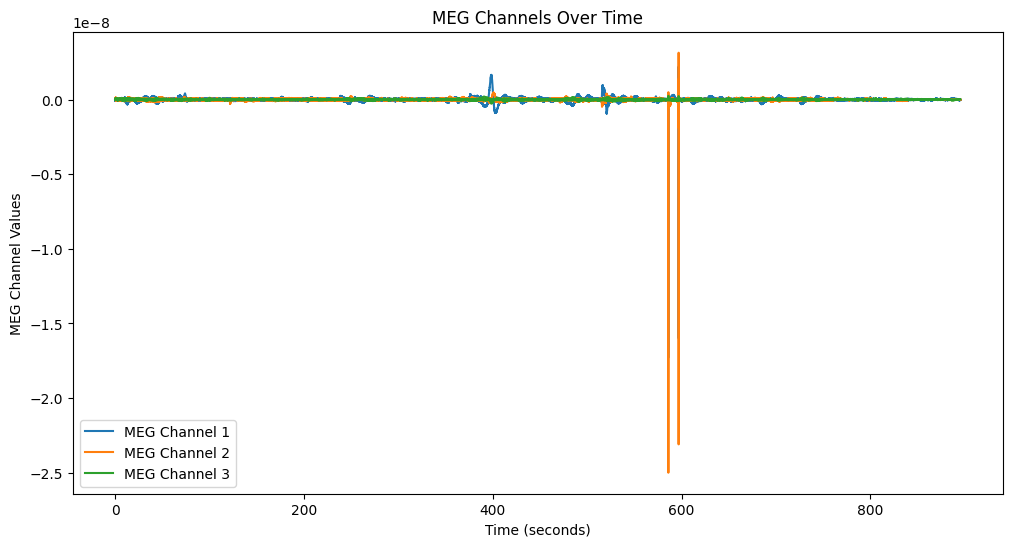

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['time_in_seconds'], df['MEG_Channel_1'], label='MEG Channel 1')
plt.plot(df['time_in_seconds'], df['MEG_Channel_2'], label='MEG Channel 2')
plt.plot(df['time_in_seconds'], df['MEG_Channel_3'], label='MEG Channel 3')
plt.xlabel('Time (seconds)')
plt.ylabel('MEG Channel Values')
plt.title('MEG Channels Over Time')
plt.legend()
plt.show()



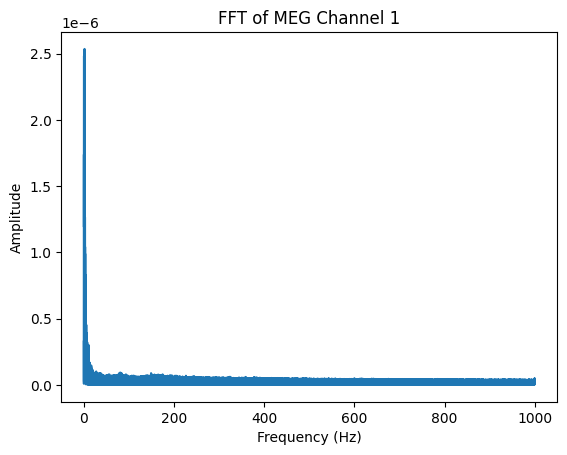

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT for a channel
def compute_fft(data, fs):
    n = len(data)  # Number of data points in the signal
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    return fft_freq, np.abs(fft_values)

# Example: Compute FFT for MEG_Channel_1
frequencies, fft_values = compute_fft(df['MEG_Channel_1'], fs=2000)

# Plot FFT magnitude
plt.plot(frequencies[:len(frequencies)//2], fft_values[:len(frequencies)//2])  # Plot positive frequencies only
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of MEG Channel 1')
plt.show()



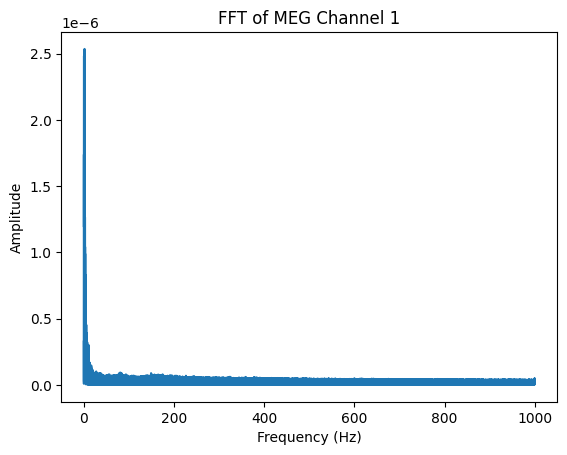

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT for a channel
def compute_fft(data, fs):
    n = len(data)  # Define n as the length of the data
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, 1/fs)
    return fft_freq, np.abs(fft_values)

# Example: Compute FFT for MEG_Channel_1
frequencies, fft_values = compute_fft(df['MEG_Channel_1'], fs=2000)

# Plot FFT magnitude
n = len(df['MEG_Channel_1'])  # Ensure n is defined
plt.plot(frequencies[:n//2], fft_values[:n//2])  # Plot positive frequencies only
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of MEG Channel 1')
plt.show()



In [29]:
!pip install mne-bids


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 645.7 kB/s eta 0:00:02
   ----------------- ---------------------- 0.5/1.2 MB 645.7 kB/s eta 0:00:02
   ----------------- ---------------------- 0.5/1.2 MB 645.7 kB/s eta 0:00:02
   ------------------------- -------------- 0.8/1.2 MB 559.5 kB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 621.7 kB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 621.7 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 620.8 kB/s eta 0:00:00


Not setting metadata
5 matching events found
No baseline correction applied


Created an SSP operator (subspace dimension = 8)
8 projection items activated
Loading data for 5 events and 8181 original time points ...


C:\Users\kiran\AppData\Local\Temp\ipykernel_46164\1785074530.py:37: RuntimeWarning: Projection vector 'grad_ssp_upright.fif : PCA-v1' has been reduced to 0.01% of its original magnitude by subselecting 304/204 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs = mne.Epochs(raw, events, event_id={'rest': 1, 'HoldL': 2},


1 bad epochs dropped
Using matplotlib as 2D backend.


c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\matplotlib_inline\backend_inline.py:27: RuntimeWarning: Projection vector 'grad_ssp_upright.fif : PCA-v1' has been reduced to 0.01% of its original magnitude by subselecting 304/204 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


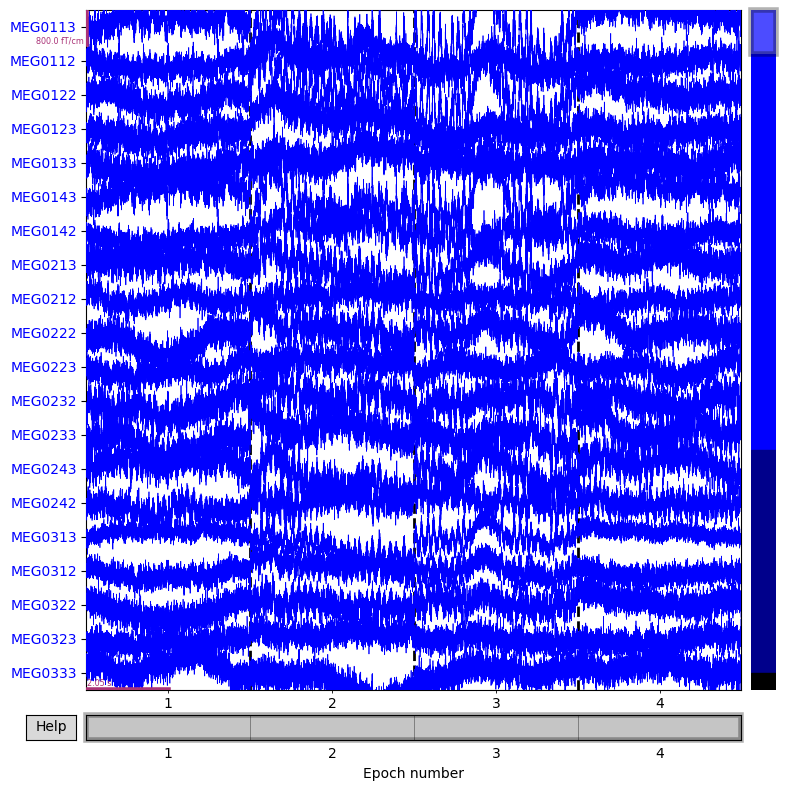

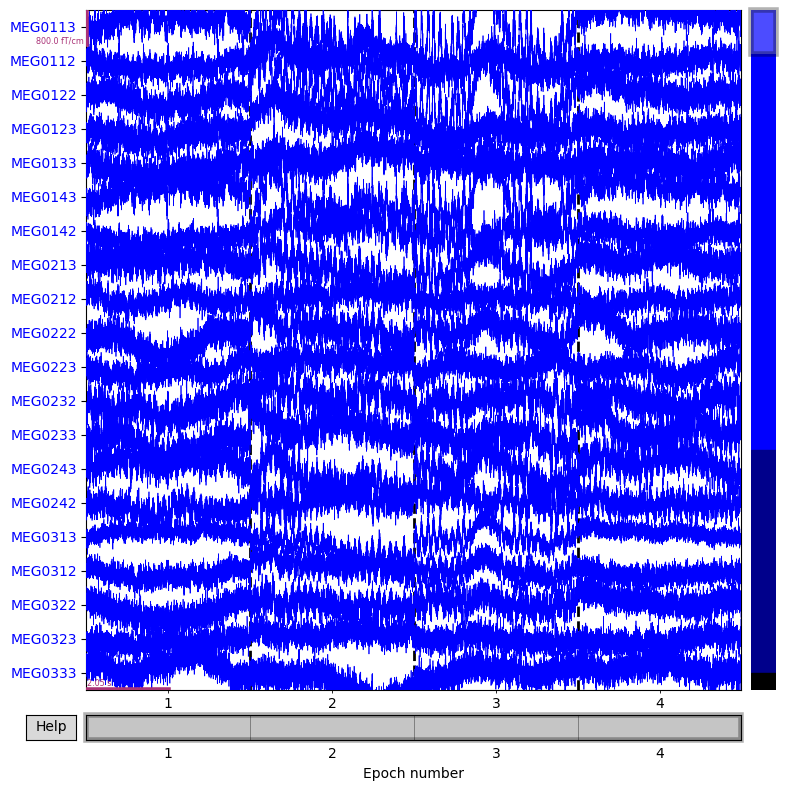

In [37]:
import pandas as pd
import mne
import numpy as np

# Load the TSV file with confirmed column names
events_path = 'C:/Users/kiran/Downloads/ds004998/ds004998/sub-0cGdk9/ses-PeriOp/meg/sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_events.tsv'
events_data = pd.read_csv(events_path, sep='\t')

# Define sampling frequency
sfreq = 2000  # Sampling frequency as per acquisition info

# Convert the event data to MNE-compatible format
event_list = []

for _, row in events_data.iterrows():
    onset_sample = int(row['onset'] * sfreq)  # Convert onset from seconds to samples
    duration_samples = int(row['duration'] * sfreq)  # Convert duration to samples
    trial_type = row['trial_type']

    # Map trial_type to integer codes for MNE compatibility
    if trial_type == 'rest':
        event_code = 1
    elif trial_type == 'HoldL':
        event_code = 2
    elif trial_type == 'bad_lfp':
        continue  # Skip 'bad_lfp' events
    else:
        event_code = 0  # Default event code if unspecified

    # Append the event in MNE format: [onset_sample, 0, event_code]
    event_list.append([onset_sample, 0, event_code])

# Convert to a numpy array
events = np.array(event_list)

# Assuming `raw` is already loaded, create epochs based on the events
epochs = mne.Epochs(raw, events, event_id={'rest': 1, 'HoldL': 2},
                    tmin=0, tmax=row['duration'], baseline=None, preload=True)

# Plot or analyze epochs as needed
epochs.plot()


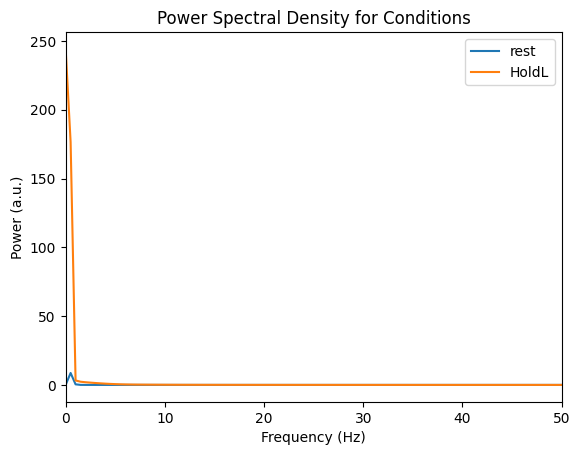

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Load the MEG/LFP data
data_path = 'C:/Users/kiran/Downloads/combined_data_3_patients.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Load events TSV file
events_path = 'C:/Users/kiran/Downloads/ds004998/ds004998/sub-0cGdk9/ses-PeriOp/meg/sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_run-1_events.tsv'
events = pd.read_csv(events_path, sep='\t')

# Define the sampling frequency
sfreq = 2000  # 2 kHz, as provided

# Fixed segment length (e.g., 2 seconds or 4000 samples)
segment_length_samples = int(2 * sfreq)

# Function to calculate PSD for a segment of data
def calculate_psd(data_segment, sfreq):
    psd_all = []
    freqs = None
    for channel in data_segment.columns:
        # Convert channel data to numeric, remove NaNs, and ensure consistent segment length
        signal = pd.to_numeric(data_segment[channel], errors='coerce').dropna().values
        signal = signal[:segment_length_samples]  # Trim or pad to segment length
        if len(signal) < segment_length_samples:  # Pad if signal is shorter than expected
            signal = np.pad(signal, (0, segment_length_samples - len(signal)), 'constant')
        
        # Calculate PSD using Welch's method
        freqs, psd = welch(signal, fs=sfreq, nperseg=segment_length_samples)
        psd_all.append(psd)
    
    psd_mean = np.mean(psd_all, axis=0)
    return freqs, psd_mean

# Iterate over each condition in events and calculate PSD
for condition in ['rest', 'HoldL']:
    condition_psds = []
    for _, row in events.iterrows():
        if row['trial_type'] == condition:
            onset_sample = int(row['onset'] * sfreq)
            duration_samples = int(row['duration'] * sfreq)
            data_segment = data.iloc[onset_sample:onset_sample + duration_samples, 1:8]  # Select MEG/LFP channels
            
            # Calculate PSD for this segment
            freqs, psd_mean = calculate_psd(data_segment, sfreq)
            condition_psds.append(psd_mean)

    # Calculate the average PSD across all segments for this condition
    avg_psd = np.mean(condition_psds, axis=0)
    plt.plot(freqs, avg_psd, label=condition)

# Plot settings
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u.)')
plt.title('Power Spectral Density for Conditions')
plt.xlim([0, 50])  # Focus on relevant frequencies (e.g., 0–50 Hz)
plt.legend()
plt.show()



In [33]:
import pandas as pd
import glob
import os

# Path where the TSV files are located (update with the correct directory)
data_dir = 'C:/Users/kiran/Downloads/ds004998/ds004998/sub-2IU8mi/ses-PeriOp/meg/'

# Get a list of all TSV files in the directory (matching any *.tsv files)
tsv_files = glob.glob(os.path.join(data_dir, '*_events.tsv'))

# Initialize an empty list to store the dataframes
all_events = []

# Loop through each TSV file and load it into a DataFrame
for file in tsv_files:
    # Read the TSV file into a pandas DataFrame
    events_df = pd.read_csv(file, sep='\t')
    
    # Optionally, add a column for the filename to keep track of which file each row came from
    events_df['source_file'] = os.path.basename(file)
    
    # Append the DataFrame to the list
    all_events.append(events_df)

# Concatenate all the DataFrames in the list into a single DataFrame
combined_events = pd.concat(all_events, ignore_index=True)

# Display the first few rows of the combined DataFrame to verify the results
print(combined_events.head())

# Optionally, save the combined DataFrame to a new CSV file
combined_events.to_csv('combined_patient_events3.csv', index=False)


      onset    duration trial_type  \
0    0.0000  300.000000       rest   
1  307.1255   60.727500      HoldL   
2  392.3555   70.210448      HoldL   
3  495.9395   66.164500      HoldL   
4  594.1985   63.154000      HoldL   

                                         source_file  
0  sub-2IU8mi_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
1  sub-2IU8mi_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
2  sub-2IU8mi_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
3  sub-2IU8mi_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
4  sub-2IU8mi_ses-PeriOp_task-HoldL_acq-MedOff_ru...  


In [36]:
import pandas as pd

# Load the event data (replace the path with your actual file path)
events_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'  # Update with the correct file path
events_df = pd.read_csv(events_path)

# Display the first few rows to inspect the structure of the data
print(events_df.head())


# Filter the events by trial type (Rest, HoldL, Move)
rest_events = events_df[events_df['trial_type'] == 'Rest']
holdl_events = events_df[events_df['trial_type'] == 'HoldL']
move_events = events_df[events_df['trial_type'] == 'Move']

# Display the first few rows of each filtered DataFrame to verify
print("Rest events:")
print(rest_events.head())

print("HoldL events:")
print(holdl_events.head())

print("Move events:")
print(move_events.head())



      onset  duration trial_type  \
0    0.0000  300.0000       rest   
1  273.0000    2.0000    bad_lfp   
2  307.1960   96.7755      HoldL   
3  437.7235   73.9740      HoldL   
4  546.3435   63.8285      HoldL   

                                         source_file  
0  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
1  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
2  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
3  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
4  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
Rest events:
Empty DataFrame
Columns: [onset, duration, trial_type, source_file]
Index: []
HoldL events:
        onset    duration trial_type  \
2  307.196000   96.775500      HoldL   
3  437.723500   73.974000      HoldL   
4  546.343500   63.828500      HoldL   
5  629.862768  105.183223      HoldL   
8  239.374401   61.623140      HoldL   

                                         source_file  
2  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...

In [37]:
# Normalize trial_type to lowercase to avoid case sensitivity issues
events_df['trial_type'] = events_df['trial_type'].str.lower()

# Now filter for the event types
rest_events = events_df[events_df['trial_type'] == 'rest']
holdl_events = events_df[events_df['trial_type'] == 'holdl']
move_events = events_df[events_df['trial_type'] == 'move']

# Display the filtered DataFrames
print("Rest events:")
print(rest_events.head())

print("HoldL events:")
print(holdl_events.head())

print("Move events:")
print(move_events.head())
# Remove bad_lfp events from the dataframe
events_df = events_df[events_df['trial_type'] != 'bad_lfp']


Rest events:
         onset    duration trial_type  \
0     0.000000  300.000000       rest   
7     0.000000  239.137780       rest   
16   71.401725   18.253673       rest   
18  151.902803   27.448116       rest   
20  244.129211   57.681194       rest   

                                          source_file  
0   sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
7   sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOn_run...  
16  sub-0cGdk9_ses-PeriOp_task-MoveL_acq-MedOff_ru...  
18  sub-0cGdk9_ses-PeriOp_task-MoveL_acq-MedOff_ru...  
20  sub-0cGdk9_ses-PeriOp_task-MoveL_acq-MedOff_ru...  
HoldL events:
        onset    duration trial_type  \
2  307.196000   96.775500      holdl   
3  437.723500   73.974000      holdl   
4  546.343500   63.828500      holdl   
5  629.862768  105.183223      holdl   
8  239.374401   61.623140      holdl   

                                         source_file  
2  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
3  sub-0cGdk9_ses-PeriOp_task-HoldL_acq

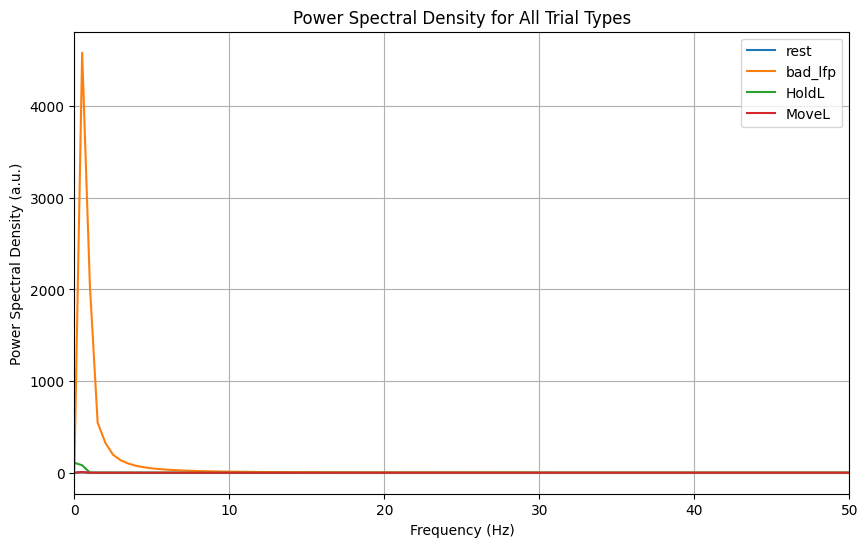

In [42]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

data_path = 'C:/Users/kiran/Downloads/cleaned_meg_data.csv.'  # Update with your file path
df = pd.read_csv(data_path)

# Load events data
events_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'  # Update with your file path
events_df = pd.read_csv(events_path)

# Define the sampling frequency
sfreq = 2000  # 2 kHz

# Fixed segment length (e.g., 2 seconds or 4000 samples)
segment_length_samples = int(2 * sfreq)

# Function to calculate PSD for a segment of data
def calculate_psd(data_segment, sfreq):
    psd_all = []
    freqs = None
    for channel in data_segment.columns:
        # Convert channel data to numeric, remove NaNs, and ensure consistent segment length
        signal = pd.to_numeric(data_segment[channel], errors='coerce').dropna().values
        signal = signal[:segment_length_samples]  # Trim or pad to segment length
        if len(signal) < segment_length_samples:  # Pad if signal is shorter than expected
            signal = np.pad(signal, (0, segment_length_samples - len(signal)), 'constant')
        
        # Calculate PSD using Welch's method
        freqs, psd = welch(signal, fs=sfreq, nperseg=segment_length_samples)
        psd_all.append(psd)
    
    psd_mean = np.mean(psd_all, axis=0)
    return freqs, psd_mean

# Function to extract segments for events
def extract_segments(events, data, sfreq):
    segments = []
    for _, row in events.iterrows():
        onset_sample = int(row['onset'] * sfreq)
        duration_samples = int(row['duration'] * sfreq)
        data_segment = data.iloc[onset_sample:onset_sample + duration_samples, 1:8]  # Select MEG/LFP channels
        segments.append(data_segment)
    return segments

# Get all unique trial types
trial_types = events_df['trial_type'].unique()

# Plot PSD for all trial types
plt.figure(figsize=(10, 6))

for trial_type in trial_types:
    # Extract segments for each trial type
    trial_events = events_df[events_df['trial_type'] == trial_type]
    trial_segments = extract_segments(trial_events, df, sfreq)

    # Calculate PSD for this trial type
    trial_psds = []
    for segment in trial_segments:
        freqs, psd = calculate_psd(segment, sfreq)
        trial_psds.append(psd)

    # Average the PSDs for all segments of this trial type
    trial_psd_avg = np.mean(trial_psds, axis=0)

    # Plot the PSD for this trial type
    plt.plot(freqs, trial_psd_avg, label=trial_type)

# Plot settings
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (a.u.)')
plt.title('Power Spectral Density for All Trial Types')
plt.xlim([0, 50])  # Focus on relevant frequencies (e.g., 0–50 Hz)
plt.legend()
plt.grid(True)
plt.show()


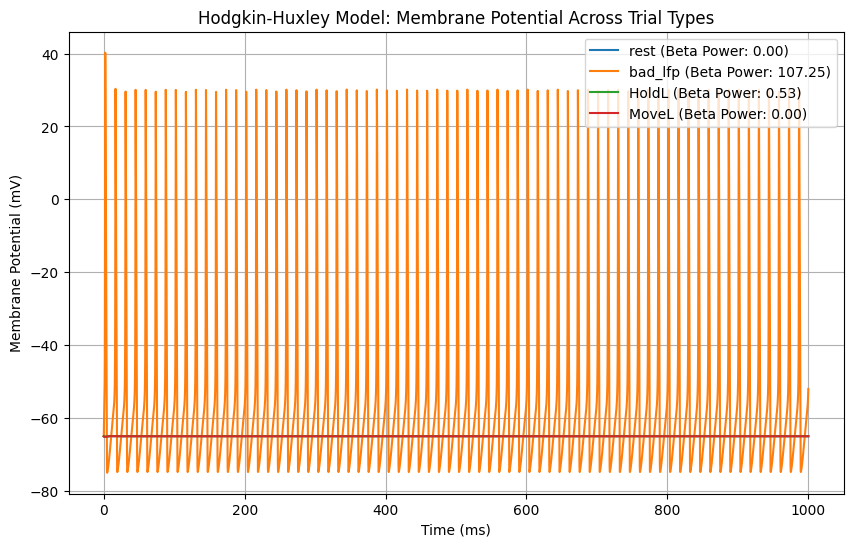

In [44]:
import pandas as pd
import numpy as np
from scipy.signal import welch
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Hodgkin-Huxley Model
def hh_model(y, t, I_ext, params):
    V, m, h, n = y
    C_m, g_Na, g_K, g_L, E_Na, E_K, E_L = params

    # Hodgkin-Huxley equations
    alpha_m = (2.5 - 0.1*(V + 65)) / (np.exp(2.5 - 0.1*(V + 65)) - 1)
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (np.exp(3.0 - 0.1*(V + 65)) + 1)
    alpha_n = (0.1 - 0.01*(V + 65)) / (np.exp(1.0 - 0.1*(V + 65)) - 1)
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    dVdt = (I_ext - (g_Na*(m**3)*h*(V - E_Na) + g_K*(n**4)*(V - E_K) + g_L*(V - E_L))) / C_m
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h
    dndt = alpha_n * (1 - n) - beta_n * n

    return [dVdt, dmdt, dhdt, dndt]

# Function to extract beta power from PSD
def extract_beta_power(psd, freqs, beta_band=(13, 30)):
    # Extract the frequency range corresponding to beta oscillations (13-30 Hz)
    beta_freqs = np.logical_and(freqs >= beta_band[0], freqs <= beta_band[1])
    beta_psd = psd[beta_freqs]
    beta_power = np.sum(beta_psd)  # Sum of power in the beta band
    return beta_power

# Get all unique trial types
trial_types = events_df['trial_type'].unique()

# Set the simulation parameters for Hodgkin-Huxley
params = [1.0, 120.0, 36.0, 0.3, 50.0, -77.0, -54.387]  # Example parameters for HH model

# Simulation time
t = np.linspace(0, 1000, 10000)  # Time range (in ms)

# Plot PSD for all trial types and simulate Hodgkin-Huxley model on top of it
plt.figure(figsize=(10, 6))

for trial_type in trial_types:
    # Extract segments for each trial type
    trial_events = events_df[events_df['trial_type'] == trial_type]
    trial_segments = extract_segments(trial_events, df, sfreq)

    # Calculate PSD for this trial type
    trial_psds = []
    for segment in trial_segments:
        freqs, psd = calculate_psd(segment, sfreq)
        trial_psds.append(psd)

    # Average the PSDs for all segments of this trial type
    trial_psd_avg = np.mean(trial_psds, axis=0)

    # Extract beta power from the PSD
    beta_power = extract_beta_power(trial_psd_avg, freqs)

    # Map beta power to input current (I_ext)
    I_ext = beta_power * 0.1  # Arbitrary scaling factor

    # Initial conditions (V, m, h, n)
    y0 = [-65, 0.05, 0.6, 0.32]  # Initial conditions
    solution = odeint(hh_model, y0, t, args=(I_ext, params))

    # Plot the membrane potential for this trial type
    plt.plot(t, solution[:, 0], label=f'{trial_type} (Beta Power: {beta_power:.2f})')

# Plot settings
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Hodgkin-Huxley Model: Membrane Potential Across Trial Types')
plt.legend()
plt.grid(True)
plt.show()


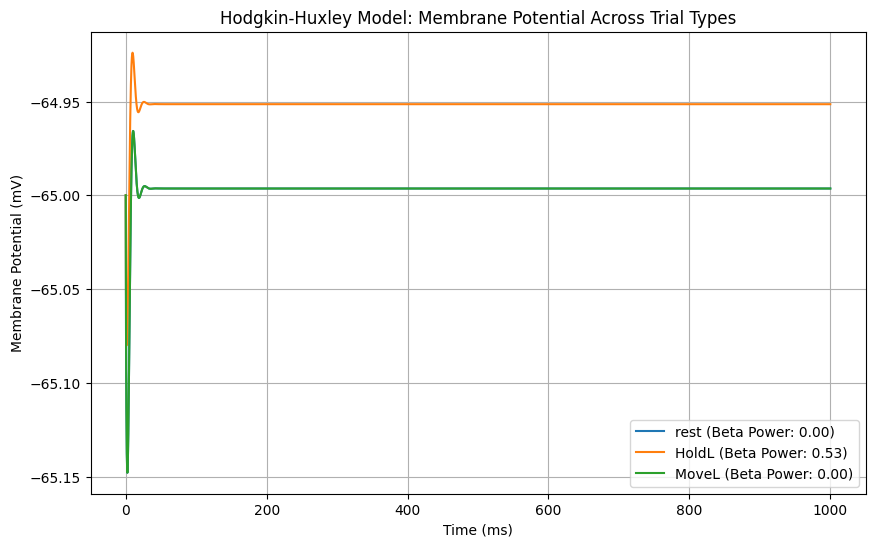

In [45]:
# Get all unique trial types excluding 'bad-lfp'
trial_types = events_df[events_df['trial_type'] != 'bad_lfp']['trial_type'].unique()

# Plot PSD for all trial types and simulate Hodgkin-Huxley model on top of it
plt.figure(figsize=(10, 6))

for trial_type in trial_types:
    # Extract segments for each trial type
    trial_events = events_df[events_df['trial_type'] == trial_type]
    trial_segments = extract_segments(trial_events, df, sfreq)

    # Calculate PSD for this trial type
    trial_psds = []
    for segment in trial_segments:
        freqs, psd = calculate_psd(segment, sfreq)
        trial_psds.append(psd)

    # Average the PSDs for all segments of this trial type
    trial_psd_avg = np.mean(trial_psds, axis=0)

    # Extract beta power from the PSD
    beta_power = extract_beta_power(trial_psd_avg, freqs)

    # Map beta power to input current (I_ext)
    I_ext = beta_power * 0.1  # Arbitrary scaling factor

    # Initial conditions (V, m, h, n)
    y0 = [-65, 0.05, 0.6, 0.32]  # Initial conditions
    solution = odeint(hh_model, y0, t, args=(I_ext, params))

    # Plot the membrane potential for this trial type
    plt.plot(t, solution[:, 0], label=f'{trial_type} (Beta Power: {beta_power:.2f})')

# Plot settings
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Hodgkin-Huxley Model: Membrane Potential Across Trial Types')
plt.legend()
plt.grid(True)
plt.show()


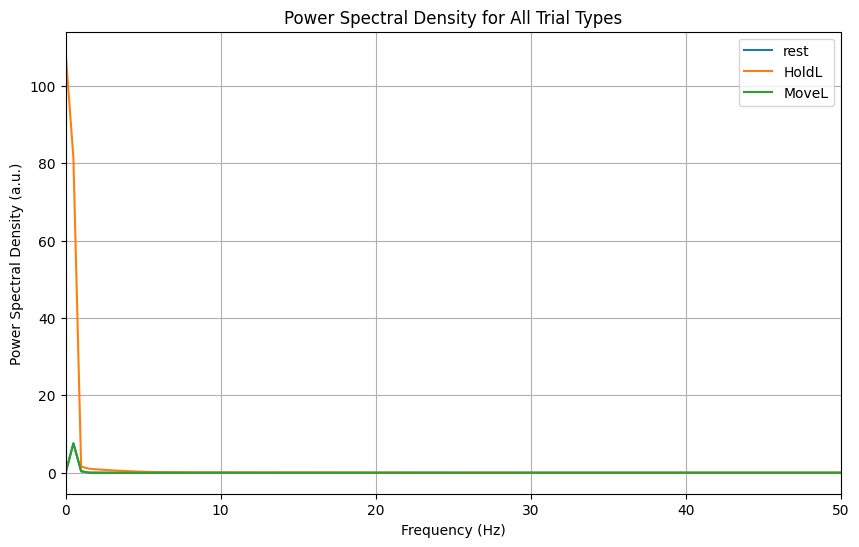

Beta power: 7.066512409828725e-09
External input current (I_ext): 7.066512409828725e-10


In [49]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Load the MEG/LFP data
data_path = 'C:/Users/kiran/Downloads/cleaned_meg_data.csv'  # Update with your file path
df = pd.read_csv(data_path)

# Load events data
events_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'  # Update with your file path
events_df = pd.read_csv(events_path)

# Define the sampling frequency
sfreq = 2000  # 2 kHz

# Fixed segment length (e.g., 2 seconds or 4000 samples)
segment_length_samples = int(2 * sfreq)

# Function to calculate PSD for a segment of data
def calculate_psd(data_segment, sfreq):
    psd_all = []
    freqs = None
    for channel in data_segment.columns:
        # Convert channel data to numeric, remove NaNs, and ensure consistent segment length
        signal = pd.to_numeric(data_segment[channel], errors='coerce').dropna().values
        signal = signal[:segment_length_samples]  # Trim or pad to segment length
        if len(signal) < segment_length_samples:  # Pad if signal is shorter than expected
            signal = np.pad(signal, (0, segment_length_samples - len(signal)), 'constant')
        
        # Calculate PSD using Welch's method
        freqs, psd = welch(signal, fs=sfreq, nperseg=segment_length_samples)
        psd_all.append(psd)
    
    psd_mean = np.mean(psd_all, axis=0)
    return freqs, psd_mean

# Extract segments for events (assuming you already have this function)
def extract_segments(events, data, sfreq):
    segments = []
    for _, row in events.iterrows():
        onset_sample = int(row['onset'] * sfreq)
        duration_samples = int(row['duration'] * sfreq)
        data_segment = data.iloc[onset_sample:onset_sample + duration_samples, 1:8]  # Select MEG/LFP channels
        segments.append(data_segment)
    return segments

# Get all unique trial types
trial_types = events_df['trial_type'].unique()

# Plot PSD for all trial types
plt.figure(figsize=(10, 6))

for trial_type in trial_types:
    # Exclude bad_lfp trial type
    if trial_type == 'bad_lfp':
        continue
    
    # Extract segments for each trial type
    trial_events = events_df[events_df['trial_type'] == trial_type]
    trial_segments = extract_segments(trial_events, df, sfreq)

    # Calculate PSD for this trial type
    trial_psds = []
    for segment in trial_segments:
        freqs, psd = calculate_psd(segment, sfreq)
        trial_psds.append(psd)

    # Average the PSDs for all segments of this trial type
    trial_psd_avg = np.mean(trial_psds, axis=0)

    # Plot the PSD for this trial type
    plt.plot(freqs, trial_psd_avg, label=trial_type)

# Plot settings
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (a.u.)')
plt.title('Power Spectral Density for All Trial Types')
plt.xlim([0, 50])  # Focus on relevant frequencies (e.g., 0–50 Hz)
plt.legend()
plt.grid(True)
plt.show()

# Now extract the beta power from the PSD
# Define the frequency range for the beta band (13-30 Hz)
beta_band_mask = (freqs >= 13) & (freqs <= 30)

# Extract the power in the beta frequency range (average power in the band)
# Assuming 'trial_psd_avg' is the PSD for a particular trial type, e.g., 'HoldL'
beta_power = np.mean(trial_psd_avg[beta_band_mask])

# Print the extracted beta power
print(f"Beta power: {beta_power}")

# Scale the beta power to determine the input current (I_ext)
I_ext = beta_power * 0.1  # Adjust the scaling factor as necessary

print(f"External input current (I_ext): {I_ext}")



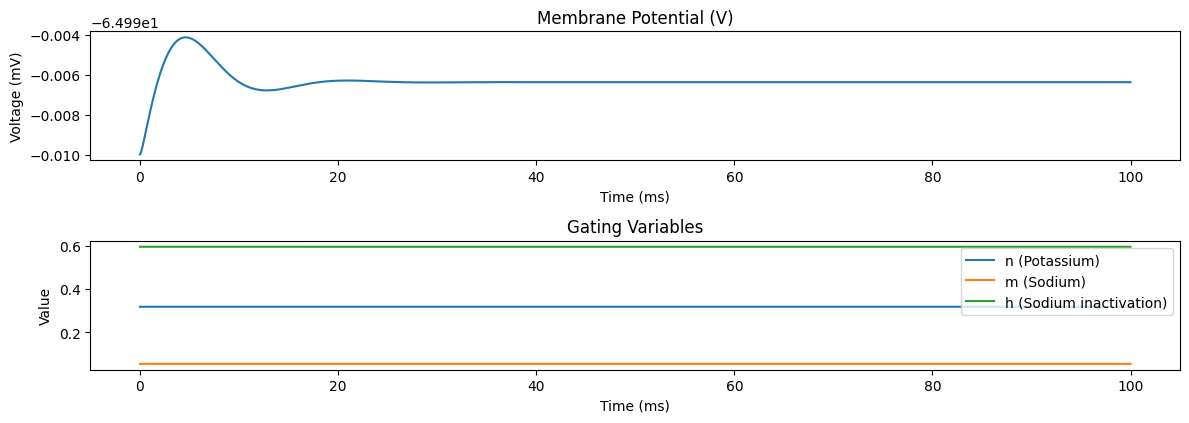

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (Hodgkin-Huxley parameters)
C_m = 1.0  # Membrane capacitance (uF/cm^2)
g_Na = 120  # Maximum sodium conductance (mS/cm^2)
g_K = 36  # Maximum potassium conductance (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50  # Sodium reversal potential (mV)
E_K = -77  # Potassium reversal potential (mV)
E_L = -54.387  # Leak reversal potential (mV)

# Time and simulation parameters
dt = 0.01  # Time step (ms)
T = 100  # Total simulation time (ms)
time = np.arange(0, T, dt)

# External input current (I_ext) based on calculated beta power (example value)
I_ext = 7.066512409828725e-10  # Scaled current, modify as necessary (nA)

# Initial conditions
V = -65  # Initial membrane potential (mV)
n = 0.3177  # Initial value of potassium activation variable
m = 0.0529  # Initial value of sodium activation variable
h = 0.5961  # Initial value of sodium inactivation variable

# Hodgkin-Huxley model functions
def alpha_m(V):
    return (2.5 - 0.1 * (V + 65)) / (np.exp(2.5 - 0.1 * (V + 65)) - 1)

def beta_m(V):
    return 4 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (np.exp(3 - 0.1 * (V + 65)) + 1)

def alpha_n(V):
    return (0.1 - 0.01 * (V + 65)) / (np.exp(1 - 0.1 * (V + 65)) - 1)

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

# Function to calculate the ionic currents
def ionic_currents(V, n, m, h):
    I_Na = g_Na * m**3 * h * (V - E_Na)  # Sodium current
    I_K = g_K * n**4 * (V - E_K)  # Potassium current
    I_L = g_L * (V - E_L)  # Leak current
    return I_Na, I_K, I_L

# Simulate the membrane potential over time
V_trace = []
n_trace = []
m_trace = []
h_trace = []

for t in time:
    # Calculate the ionic currents
    I_Na, I_K, I_L = ionic_currents(V, n, m, h)
    
    # Update the membrane potential using the Hodgkin-Huxley equation
    dV = (I_ext - I_Na - I_K - I_L) / C_m
    V += dV * dt
    
    # Update gating variables using their differential equations
    dn = (alpha_n(V) * (1 - n) - beta_n(V) * n)
    dm = (alpha_m(V) * (1 - m) - beta_m(V) * m)
    dh = (alpha_h(V) * (1 - h) - beta_h(V) * h)
    
    # Update gating variables
    n += dn * dt
    m += dm * dt
    h += dh * dt
    
    # Store the values for plotting
    V_trace.append(V)
    n_trace.append(n)
    m_trace.append(m)
    h_trace.append(h)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot membrane potential
plt.subplot(3, 1, 1)
plt.plot(time, V_trace)
plt.title('Membrane Potential (V)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

# Plot gating variables
plt.subplot(3, 1, 2)
plt.plot(time, n_trace, label='n (Potassium)')
plt.plot(time, m_trace, label='m (Sodium)')
plt.plot(time, h_trace, label='h (Sodium inactivation)')
plt.title('Gating Variables')
plt.xlabel('Time (ms)')
plt.ylabel('Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


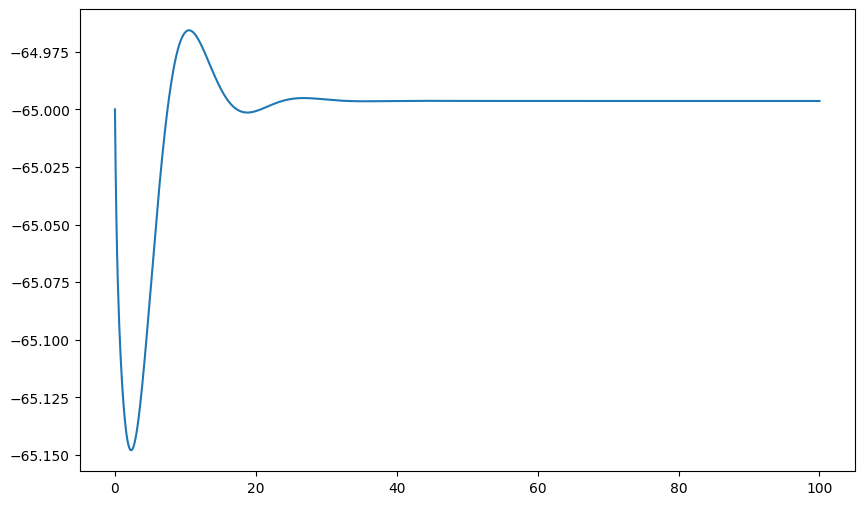

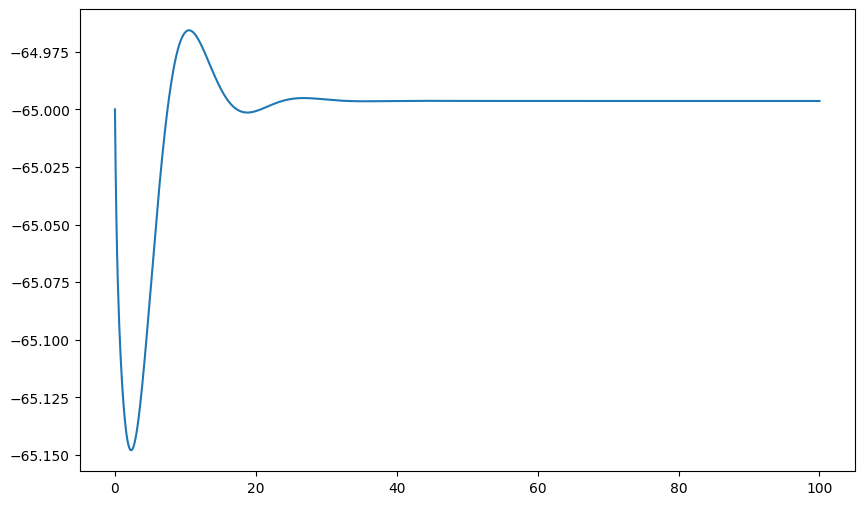

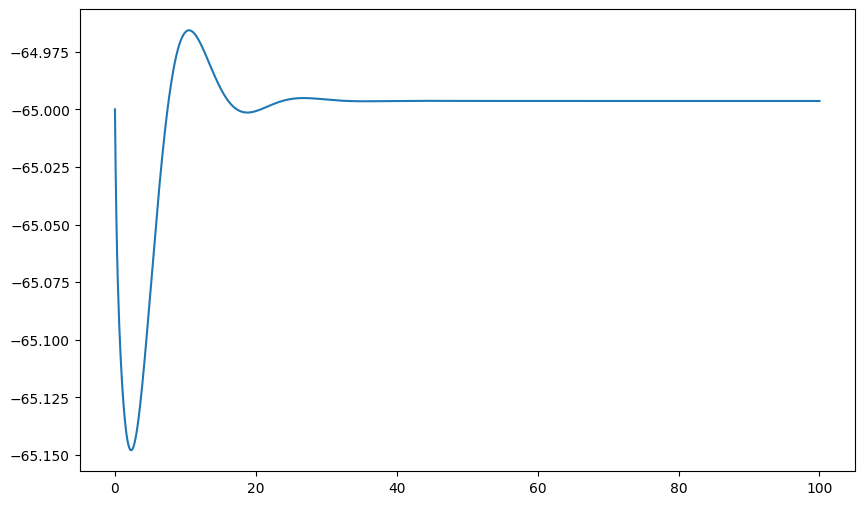

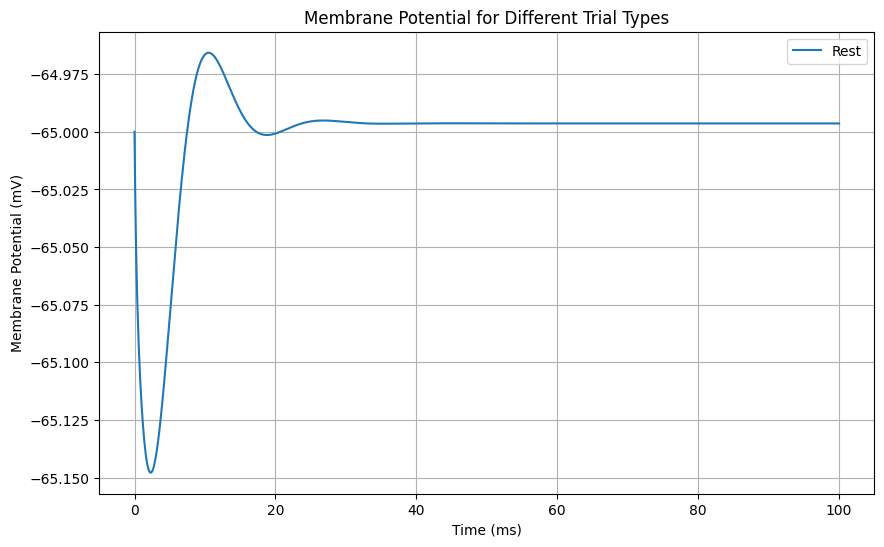

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

data_path = 'C:/Users/kiran/Downloads/cleaned_meg_data.csv'  # Update with your file path
df = pd.read_csv(data_path)

# Load events data
events_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'  # Update with your file path
events_df = pd.read_csv(events_path)

# Define the sampling frequency
sfreq = 2000  # Hz

# Define Hodgkin-Huxley Model (previously given, truncated for brevity)
# Add the model parameters (channel conductances, reversal potentials, etc.)
def hodgkin_huxley(y, t, I_ext):
    V, m, h, n = y
    # Constants for sodium, potassium channels
    ENa = 50.0  # mV
    EK = -77.0  # mV
    EL = -54.387  # mV
    gNa = 120.0  # mS/cm^2
    gK = 36.0  # mS/cm^2
    gL = 0.3  # mS/cm^2

    # Voltage-dependent rate functions
    alpha_m = (2.5 - 0.1*(V+65)) / (np.exp(2.5 - 0.1*(V+65)) - 1)
    beta_m = 4.0 * np.exp(-(V+65)/18)
    alpha_h = 0.07 * np.exp(-(V+65)/20)
    beta_h = 1 / (np.exp(3.0 - 0.1*(V+65)) + 1)
    alpha_n = (0.1 - 0.01*(V+65)) / (np.exp(1.0 - 0.1*(V+65)) - 1)
    beta_n = 0.125 * np.exp(-(V+65)/80)

    # Membrane currents (sodium, potassium, and leak)
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)

    # Differential equations
    dVdt = (I_ext - INa - IK - IL)
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h
    dndt = alpha_n * (1 - n) - beta_n * n

    return [dVdt, dmdt, dhdt, dndt]

# Function to calculate I_ext for different conditions (e.g., Medication, Movement)
def calculate_I_ext(trial_type, beta_power):
    # Simulate how I_ext changes based on trial type
    if trial_type == 'MedOn':
        # Increase external current during MedOn (example scaling factor)
        I_ext = beta_power * 0.1  # Adjust based on real experimental data
    elif trial_type == 'MedOff':
        # Decrease external current during MedOff (example scaling factor)
        I_ext = beta_power * 0.05  # Adjust based on real experimental data
    elif trial_type == 'HoldL':  # Active task, might involve movement
        I_ext = beta_power * 0.15  # Increased I_ext during active task
    else:  # Rest condition
        I_ext = beta_power * 0.05  # Low external input during rest
    return I_ext

# Select conditions (for example, MedOn, HoldL, etc.)
for trial_type in ['MedOn', 'MedOff', 'HoldL', 'Rest']:
    trial_data = events_df[events_df['trial_type'] == trial_type]

    # Calculate beta power (replace this with actual calculation based on your dataset)
    beta_power = 7.066512409828725e-09  # Example value from your earlier calculation
    
    # Calculate I_ext based on trial type and beta power
    I_ext = calculate_I_ext(trial_type, beta_power)

    # Initial conditions (V, m, h, n) - resting state (could be adjusted as needed)
    y0 = [-65.0, 0.05, 0.6, 0.32]  # Example initial conditions

    # Time points for simulation (e.g., 0 to 100 ms)
    t = np.linspace(0, 100, 1000)  # 100 ms, 1000 time points

    # Integrate the Hodgkin-Huxley model
    solution = odeint(hodgkin_huxley, y0, t, args=(I_ext,))

    # Extract membrane potential from the solution
    V = solution[:, 0]

    # Plot the membrane potential for each condition
    plt.figure(figsize=(10, 6))
    plt.plot(t, V, label=trial_type)

plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential for Different Trial Types')
plt.legend()
plt.grid(True)
plt.show()


Beta power for HoldL: 0.015040507549652447
Beta power for Rest: 7.066512409828747e-09
Beta power for MoveL: 7.066512409828725e-09
External input current (I_ext) for HoldL: 0.0015040507549652447
External input current (I_ext) for Rest: 7.066512409828747e-10
External input current (I_ext) for movel: 7.066512409828725e-10


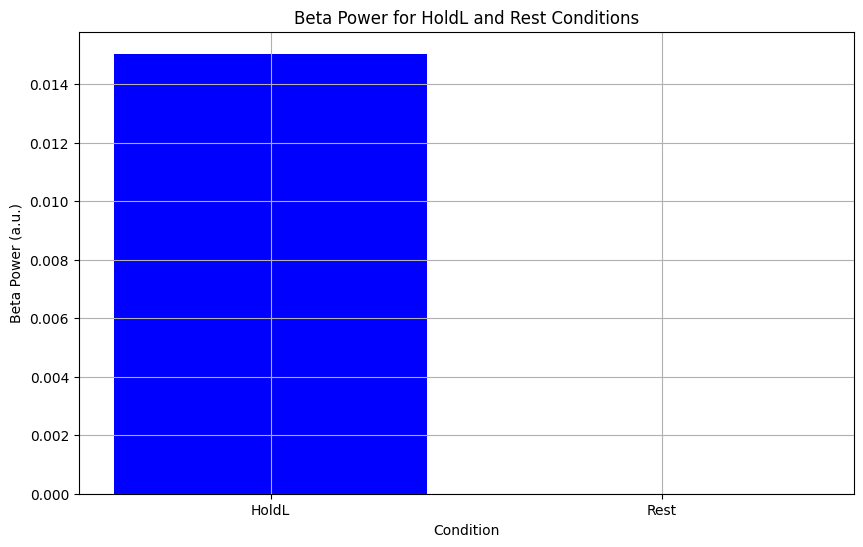

In [71]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Load the MEG/LFP data
data_path = 'C:/Users/kiran/Downloads/cleaned_meg_data.csv'  # Update with your file path
df = pd.read_csv(data_path)

# Load events data
events_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'  # Update with your file path
events_df = pd.read_csv(events_path)

# Define the sampling frequency
sfreq = 2000  # 2 kHz

# Fixed segment length (e.g., 2 seconds or 4000 samples)
segment_length_samples = int(2 * sfreq)

# Function to calculate PSD for a segment of data
def calculate_psd(data_segment, sfreq):
    psd_all = []
    freqs = None
    for channel in data_segment.columns:
        # Convert channel data to numeric, remove NaNs, and ensure consistent segment length
        signal = pd.to_numeric(data_segment[channel], errors='coerce').dropna().values
        signal = signal[:segment_length_samples]  # Trim or pad to segment length
        if len(signal) < segment_length_samples:  # Pad if signal is shorter than expected
            signal = np.pad(signal, (0, segment_length_samples - len(signal)), 'constant')
        
        # Calculate PSD using Welch's method
        freqs, psd = welch(signal, fs=sfreq, nperseg=segment_length_samples)
        psd_all.append(psd)
    
    psd_mean = np.mean(psd_all, axis=0)
    return freqs, psd_mean

# Extract segments for events (assuming you already have this function)
def extract_segments(events, data, sfreq):
    segments = []
    for _, row in events.iterrows():
        onset_sample = int(row['onset'] * sfreq)
        duration_samples = int(row['duration'] * sfreq)
        data_segment = data.iloc[onset_sample:onset_sample + duration_samples, 1:8]  # Select MEG/LFP channels
        segments.append(data_segment)
    return segments

# Get the 'HoldL' and 'Rest' events
holdl_events = events_df[events_df['trial_type'] == 'HoldL']
rest_events = events_df[events_df['trial_type'] == 'rest']
movel_events = events_df[events_df['trial_type'] == 'MoveL']
# Extract segments for 'HoldL' and 'Rest' conditions
holdl_segments = extract_segments(holdl_events, df, sfreq)
rest_segments = extract_segments(rest_events, df, sfreq)
movel_segments = extract_segments(movel_events, df, sfreq)

# Function to calculate the beta power for a given set of segments
def calculate_beta_power_for_segments(segments, sfreq):
    beta_powers = []
    for segment in segments:
        freqs, psd = calculate_psd(segment, sfreq)
        
        # Define the beta frequency range dynamically based on the freqs array
        beta_band_mask = (freqs >= 13) & (freqs <= 30)  # Select frequencies between 13-30 Hz
        
        # Extract the power in the beta frequency range (average power in the band)
        beta_power = np.mean(psd[beta_band_mask])  # Apply the mask to the PSD
        beta_powers.append(beta_power)
    
    return np.mean(beta_powers)

# Calculate the beta power for 'HoldL' and 'Rest'
beta_power_holdl = calculate_beta_power_for_segments(holdl_segments, sfreq)
beta_power_rest = calculate_beta_power_for_segments(rest_segments, sfreq)
beta_power_movel = calculate_beta_power_for_segments(movel_segments, sfreq)

# Print the calculated beta powers for 'HoldL' and 'Rest'
print(f"Beta power for HoldL: {beta_power_holdl}")
print(f"Beta power for Rest: {beta_power_rest}")
print(f"Beta power for MoveL: {beta_power_movel}")

# Scale the beta power to determine the input current (I_ext) for both conditions
I_ext_holdl = beta_power_holdl * 0.1  # Adjust the scaling factor as necessary
I_ext_rest = beta_power_rest * 0.1  # Adjust the scaling factor as necessary
I_ext_movel = beta_power_movel * 0.1

print(f"External input current (I_ext) for HoldL: {I_ext_holdl}")
print(f"External input current (I_ext) for Rest: {I_ext_rest}")
print(f"External input current (I_ext) for movel: {I_ext_movel}")

# Plot the beta power for both conditions
plt.figure(figsize=(10, 6))
plt.bar(['HoldL', 'Rest'], [beta_power_holdl, beta_power_rest], color=['blue', 'green'])
plt.xlabel('Condition')
plt.ylabel('Beta Power (a.u.)')
plt.title('Beta Power for HoldL and Rest Conditions')
plt.grid(True)
plt.show()


In [87]:
# Load the events data to analyze its structure
events_file_path = 'C:/Users/kiran/Downloads/combined_patient_events1.csv'
events_data = pd.read_csv(events_file_path)

# Display the first few rows and the column names to understand its structure
events_data.head(), events_data.columns


(      onset  duration trial_type  \
 0    0.0000  300.0000       rest   
 1  273.0000    2.0000    bad_lfp   
 2  307.1960   96.7755      HoldL   
 3  437.7235   73.9740      HoldL   
 4  546.3435   63.8285      HoldL   
 
                                          source_file  
 0  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
 1  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
 2  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
 3  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  
 4  sub-0cGdk9_ses-PeriOp_task-HoldL_acq-MedOff_ru...  ,
 Index(['onset', 'duration', 'trial_type', 'source_file'], dtype='object'))

In [88]:
import pandas as pd

# Assuming you have already loaded your MEG data into a DataFrame called 'meg_data'

# Filter for the specific patient
patient_id = 'sub-0cGdk9'
patient_meg_data = meg_data[meg_data['subject id'] == patient_id]


In [89]:
# Assuming you have loaded your events data into a DataFrame called 'events_data'

# Function to extract subject id from source_file
def extract_subject_id(source_file):
    # Assuming the source_file follows the pattern 'sub-<subject_id>_...'
    import re
    match = re.match(r'sub-([a-zA-Z0-9]+)', source_file)
    if match:
        return 'sub-' + match.group(1)
    else:
        return None

# Apply the function to create a 'subject id' column
events_data['subject id'] = events_data['source_file'].apply(extract_subject_id)


In [90]:
patient_events_data = events_data[events_data['subject id'] == patient_id]


In [91]:
# Define the sampling frequency (Hz)
sfreq = 2000  # Update with your actual sampling frequency if different

# Function to extract segments based on events
def extract_segments(events, meg_data, sfreq):
    segments = []
    for _, row in events.iterrows():
        onset_sample = int(row['onset'] * sfreq)
        duration_samples = int(row['duration'] * sfreq)
        segment = meg_data.iloc[onset_sample:onset_sample + duration_samples]
        segments.append(segment)
    return segments

# Extract segments for the patient
patient_segments = extract_segments(patient_events_data, patient_meg_data, sfreq)


In [92]:
from scipy.signal import welch
import numpy as np

# Function to calculate beta power for a segment
def calculate_beta_power(segment, sfreq):
    # Assuming MEG data channels are named 'MEG_Channel_1', 'MEG_Channel_2', 'MEG_Channel_3'
    # You can average across channels or select specific ones
    psd_all = []
    for channel in ['MEG_Channel_1', 'MEG_Channel_2', 'MEG_Channel_3']:
        freqs, psd = welch(segment[channel], fs=sfreq, nperseg=1024)
        psd_all.append(psd)
    psd_mean = np.mean(psd_all, axis=0)
    beta_band = (13, 30)  # Define beta band
    beta_mask = (freqs >= beta_band[0]) & (freqs <= beta_band[1])
    beta_power = np.mean(psd_mean[beta_mask])
    return beta_power

# Calculate beta power for all segments
beta_powers = [calculate_beta_power(segment, sfreq) for segment in patient_segments]
average_beta_power = np.mean(beta_powers)
print(f"Average beta power for patient {patient_id}: {average_beta_power}")


Average beta power for patient sub-0cGdk9: nan


c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [98]:
print(patient_meg_data['time_in_seconds'].min(), patient_meg_data['time_in_seconds'].max())


0.0 736.49


In [100]:
def lif_neuron(I_ext, t):
    tau_m = 10.0  # Membrane time constant (ms)
    V_rest = -65.0  # Resting potential (mV)
    V_thresh = -50.0  # Spike threshold (mV)
    V_reset = -65.0  # Reset potential after a spike (mV)
    R_m = 10.0  # Membrane resistance (MΩ)
    dt = 0.1  # Time step (ms)

    V = np.full(len(t), V_rest)
    spikes = []
    for i in range(1, len(t)):
        dV = (-(V[i-1] - V_rest) + R_m * I_ext) / tau_m
        V[i] = V[i-1] + dV * dt
        if V[i] >= V_thresh:
            V[i] = V_reset
            spikes.append(t[i])
    return V, spikes


In [101]:
freqs, psd = welch(segment['MEG_Channel_1'], fs=sfreq, nperseg=1024)
beta_band = (freqs >= 13) & (freqs <= 30)
beta_power = np.mean(psd[beta_band])
print(f"Beta power: {beta_power}")


Beta power: 1.0252833326462064e-24


In [102]:
t = np.arange(0, 1000, 0.1)  # 1000 ms with 0.1 ms time step


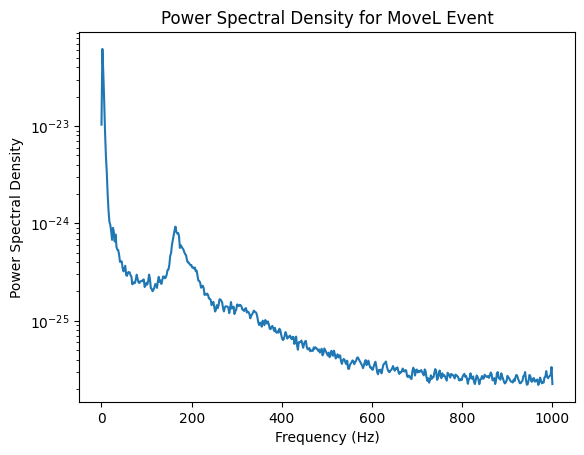

In [103]:
import matplotlib.pyplot as plt

plt.semilogy(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density for MoveL Event')
plt.show()


Number of spikes in MEG_Channel_1:
MedOn: 166222, MedOff: 159965


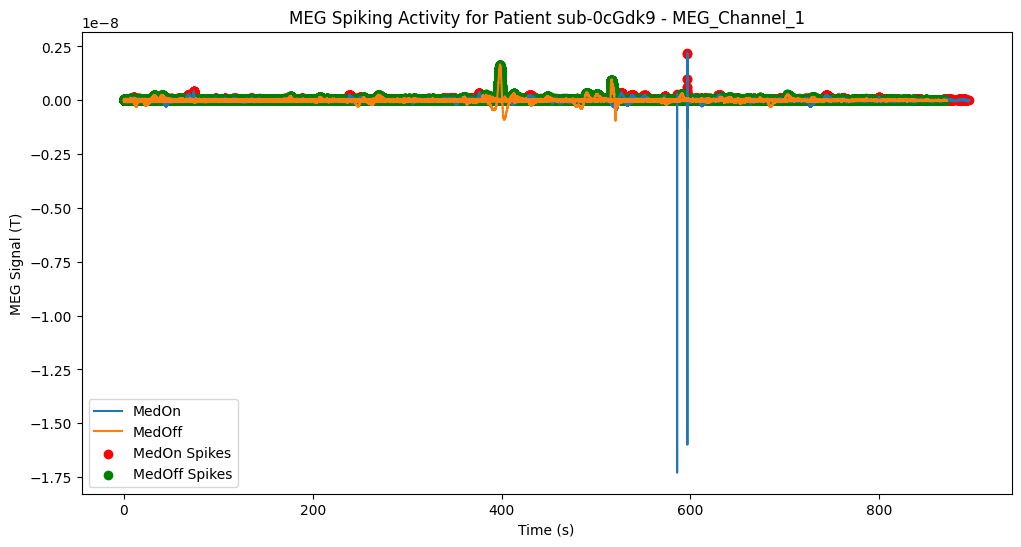

Number of spikes in MEG_Channel_2:
MedOn: 142368, MedOff: 137964


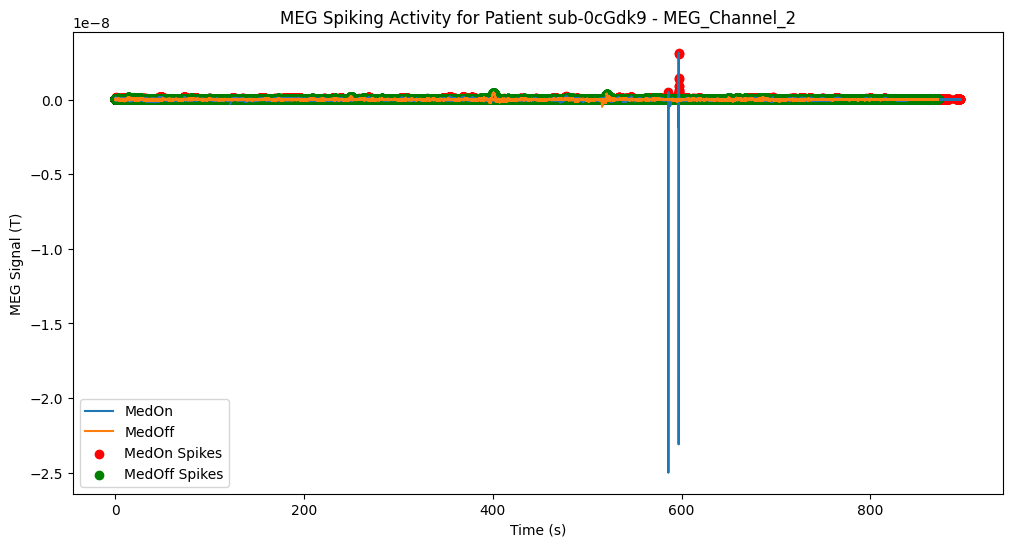

Number of spikes in MEG_Channel_3:
MedOn: 136814, MedOff: 148141


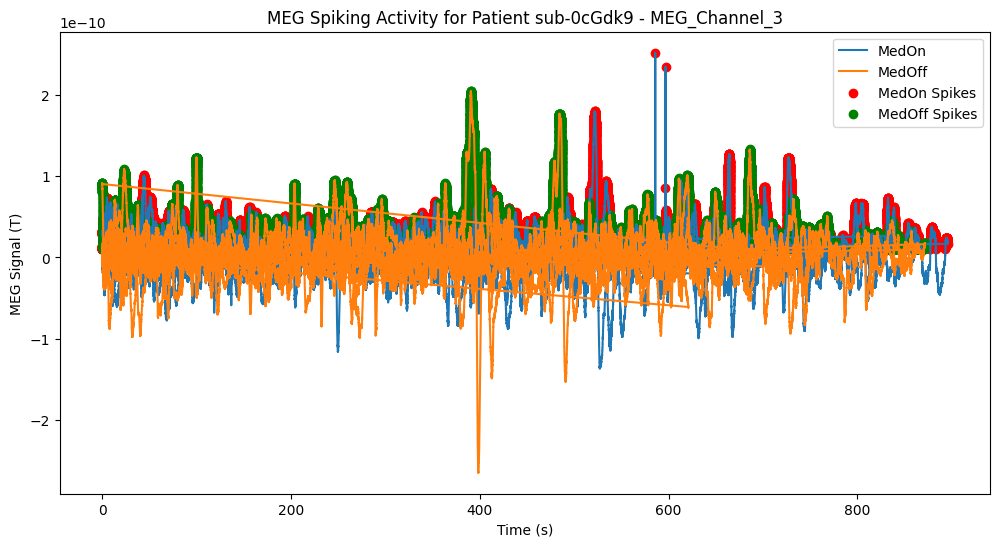

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the events data
events_df = pd.read_csv("C:\\Users\\kiran\\Downloads\\combined_patient_events1.csv")

# Load the MEG sensor data
meg_df = pd.read_csv("C:\\Users\\kiran\\Downloads\\cleaned_meg_data.csv")

# Filter for the specific patient
patient_id = "sub-0cGdk9"
patient_events = events_df[events_df['source_file'].str.contains(patient_id)]

# Separate MedOn and MedOff conditions
med_on_events = patient_events[patient_events['source_file'].str.contains('MedOn')]
med_off_events = patient_events[patient_events['source_file'].str.contains('MedOff')]

# Function to detect spikes (placeholder - replace with your specific algorithm)
def detect_spikes(data, threshold):
    return np.where(data > threshold)[0]

# Analyze spikes for each condition and channel
channels = ['MEG_Channel_1', 'MEG_Channel_2', 'MEG_Channel_3']
threshold = 1e-11  # Adjust this threshold based on your data

for channel in channels:
    med_on_spikes = detect_spikes(meg_df[meg_df['medication_status'] == 'MedOn'][channel], threshold)
    med_off_spikes = detect_spikes(meg_df[meg_df['medication_status'] == 'MedOff'][channel], threshold)
    
    print(f"Number of spikes in {channel}:")
    print(f"MedOn: {len(med_on_spikes)}, MedOff: {len(med_off_spikes)}")

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(meg_df[meg_df['medication_status'] == 'MedOn']['time_in_seconds'], 
             meg_df[meg_df['medication_status'] == 'MedOn'][channel], label='MedOn')
    plt.plot(meg_df[meg_df['medication_status'] == 'MedOff']['time_in_seconds'], 
             meg_df[meg_df['medication_status'] == 'MedOff'][channel], label='MedOff')
    plt.scatter(meg_df[meg_df['medication_status'] == 'MedOn']['time_in_seconds'].iloc[med_on_spikes], 
                meg_df[meg_df['medication_status'] == 'MedOn'][channel].iloc[med_on_spikes], 
                color='red', label='MedOn Spikes')
    plt.scatter(meg_df[meg_df['medication_status'] == 'MedOff']['time_in_seconds'].iloc[med_off_spikes], 
                meg_df[meg_df['medication_status'] == 'MedOff'][channel].iloc[med_off_spikes], 
                color='green', label='MedOff Spikes')
    plt.legend()
    plt.title(f"MEG Spiking Activity for Patient {patient_id} - {channel}")
    plt.xlabel("Time (s)")
    plt.ylabel("MEG Signal (T)")
    plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Load the datasets
events_df = pd.read_csv("C:\\Users\\kiran\\Downloads\\combined_patient_events1.csv")
meg_df = pd.read_csv("C:\\Users\\kiran\\Downloads\\cleaned_meg_data.csv")

# Filter data for the target patient
target_patient_id = "sub-0cGdk9"  # Replace with your target patient identifier
meg_df_target = meg_df[meg_df['subject id'].str.contains(target_patient_id)]
events_df_target = events_df[events_df['source_file'].str.contains(target_patient_id)]

# Normalize MEG channels
def normalize_signal(signal, min_val=0, max_val=1):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * (max_val - min_val) + min_val

meg_df_target['P_E'] = normalize_signal(meg_df_target['MEG_Channel_1'])
meg_df_target['P_I'] = normalize_signal(meg_df_target['MEG_Channel_2'])
meg_df_target['P_Modulator'] = normalize_signal(meg_df_target['MEG_Channel_3'])

# Create interpolating functions for dynamic inputs
P_E_func = interp1d(meg_df_target['time_in_seconds'], meg_df_target['P_E'], fill_value="extrapolate")
P_I_func = interp1d(meg_df_target['time_in_seconds'], meg_df_target['P_I'], fill_value="extrapolate")
P_Modulator_func = interp1d(meg_df_target['time_in_seconds'], meg_df_target['P_Modulator'], fill_value="extrapolate")

# Define the sigmoid activation function
def sigmoid(x, beta=1, theta=0):
    return 1 / (1 + np.exp(-beta * (x - theta)))

# Define the Wilson-Cowan model equations
def wilson_cowan_three_channels(t, y, w_ee, w_ei, w_ie, w_ii, P_E_func, P_I_func, P_Modulator_func, beta, theta):
    E, I = y
    P_E = P_E_func(t)  # Input from MEG_Channel_1
    P_I = P_I_func(t)  # Input from MEG_Channel_2
    P_Modulator = P_Modulator_func(t)  # Input from MEG_Channel_3

    # Modulator influences both E and I
    dE_dt = -E + sigmoid(w_ee * E - w_ei * I + P_E + P_Modulator, beta, theta)
    dI_dt = -I + sigmoid(w_ie * E - w_ii * I + P_I - 0.5 * P_Modulator, beta, theta)
    return [dE_dt, dI_dt]

# Parameters for the Wilson-Cowan model
w_ee, w_ei, w_ie, w_ii = 10, 10, 10, 10  # Connection weights
beta, theta = 1.0, 0.5                  # Sigmoid parameters
t_span = (0, 100)                       # Time range
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points for evaluation
y0 = [meg_df_target['P_E'].iloc[0], meg_df_target['P_I'].iloc[0]]  # Initial conditions

# Solve the Wilson-Cowan model
solution = solve_ivp(
    wilson_cowan_three_channels, t_span, y0,
    args=(w_ee, w_ei, w_ie, w_ii, P_E_func, P_I_func, P_Modulator_func, beta, theta),
    t_eval=t_eval
)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, solution.y[0], label='Excitatory (E)', color='blue')
plt.plot(solution.t, solution.y[1], label='Inhibitory (I)', color='red')
plt.plot(meg_df_target['time_in_seconds'], meg_df_target['P_E'], label='P_E (MEG_Channel_1)', linestyle='dashed', color='black')
plt.plot(meg_df_target['time_in_seconds'], meg_df_target['P_I'], label='P_I (MEG_Channel_2)', linestyle='dashed', color='gray')
plt.plot(meg_df_target['time_in_seconds'], meg_df_target['P_Modulator'], label='Modulator (MEG_Channel_3)', linestyle='dotted', color='green')
plt.title(f'Wilson-Cowan Model with MEG Inputs for Patient {target_patient_id}')
plt.xlabel('Time')
plt.ylabel('Activity / Input')
plt.legend()
plt.grid()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_22744\359701766.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meg_df_target['P_E'] = normalize_signal(meg_df_target['MEG_Channel_1'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_22744\359701766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meg_df_target['P_I'] = normalize_signal(meg_df_target['MEG_Channel_2'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_22744\359701766.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

KeyboardInterrupt: 

In [3]:
# Specify the target patient ID
target_patient_id = "sub-0cGdk9"  # Replace with your patient's identifier

# Filter the MEG data for the target patient
meg_df_target = meg_df[meg_df['subject id'].str.contains(target_patient_id)]

# Filter the events data for the target patient
events_df_target = events_df[events_df['source_file'].str.contains(target_patient_id)]


In [48]:
!pip install brian2


   ---------------------------------------- 0.0/967.5 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/967.5 kB ? eta -:--:--
   -------------------------------- ------- 786.4/967.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 967.5/967.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 4.4 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.2 MB/s eta 0:00:00
